In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from scipy import stats
from scipy.stats import norm, skew
import warnings

# Configure visualization settings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
RANDOM_SEED = 42

In [6]:
# Load datasets
train_data = pd.read_csv('C:/Users/silve/HousePricePrediction/data/train.csv')
test_data = pd.read_csv('C:/Users/silve/HousePricePrediction/data/test.csv')

# Display basic information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (1460, 81)
Test data shape: (1459, 80)


In [7]:
# Display first few rows of training data
print("\nFirst 5 rows of training data:")
display(train_data.head())

# Get column information
print("\nDataset Information:")
train_data.info()

# Get statistical summary of numerical features
print("\nStatistical Summary of Numerical Features:")
display(train_data.describe())

# Check data types
print("\nData Types:")
print(train_data.dtypes.value_counts())


First 5 rows of training data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Data Types:
object     43
int64      35
float64     3
Name: count, dtype: int64



Features with missing values:


,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


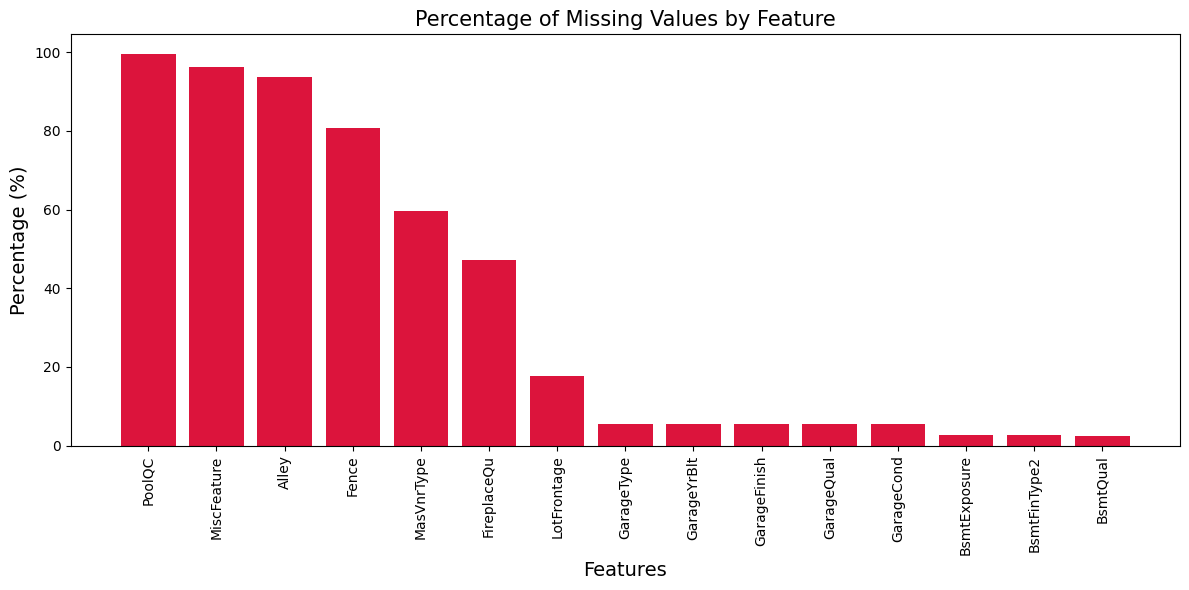

In [8]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_percent = (missing_values / len(train_data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values,
                          'Percentage': missing_percent})

# Display features with missing values
print("\nFeatures with missing values:")
missing_features = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
display(missing_features)

# Visualize missing values (top 15 features with missing values)
plt.figure(figsize=(12, 6))
missing_features_plot = missing_features.head(15)
plt.bar(missing_features_plot.index, missing_features_plot['Percentage'], color='crimson')
plt.title('Percentage of Missing Values by Feature', fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

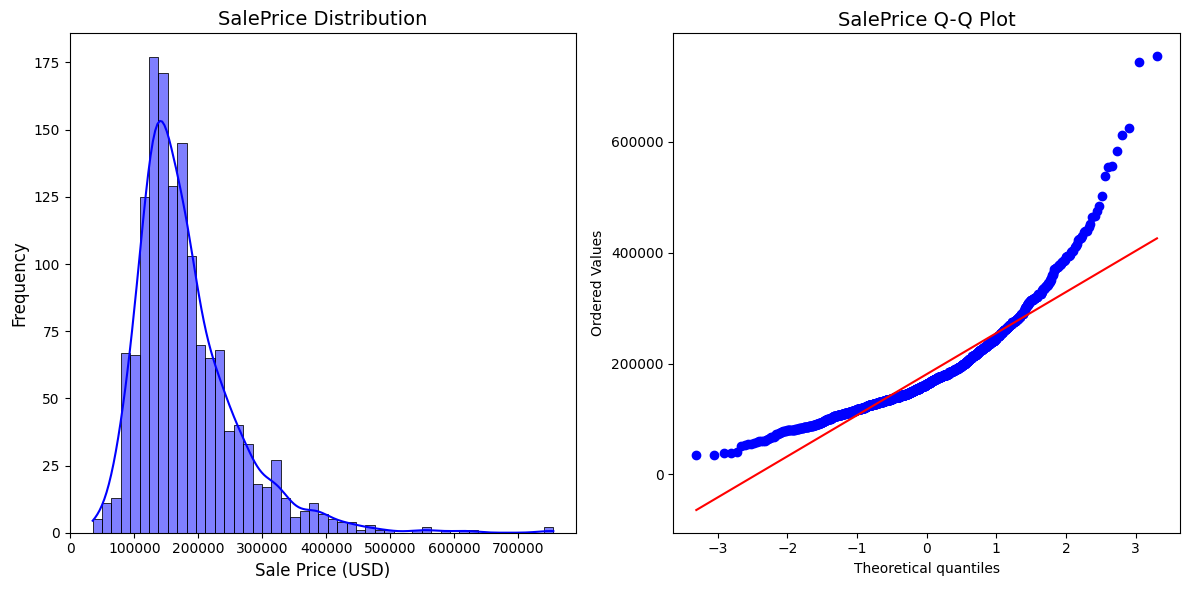

SalePrice Statistics:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8809
Kurtosis: 6.5098


In [10]:
from scipy import stats
# Distribution of the target variable
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('SalePrice Distribution', fontsize=14)
plt.xlabel('Sale Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
stats.probplot(train_data['SalePrice'], plot=plt)
plt.title('SalePrice Q-Q Plot', fontsize=14)

plt.tight_layout()
plt.show()

# Statistical summary of SalePrice
sale_price_stats = train_data['SalePrice'].describe()
print("SalePrice Statistics:")
display(sale_price_stats)

# Calculate skewness and kurtosis
from scipy.stats import skew, kurtosis
skewness = skew(train_data['SalePrice'])
kurt = kurtosis(train_data['SalePrice'])
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")

Top 10 Features Positively Correlated with SalePrice:


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

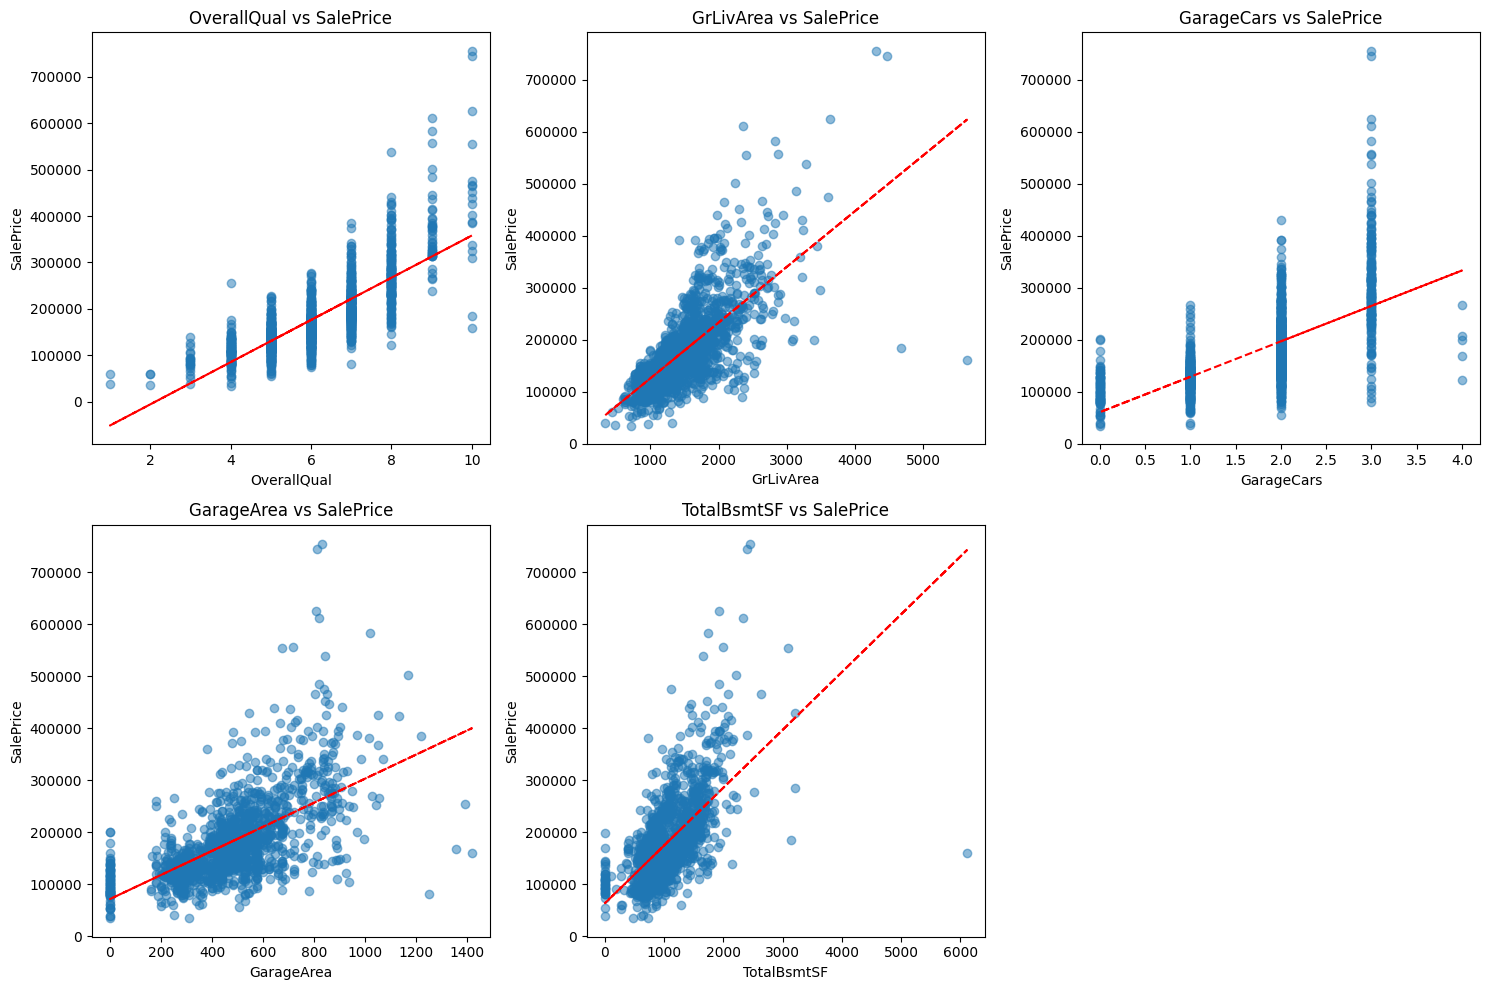

In [11]:
# Select numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_features if col != 'Id' and col != 'SalePrice']

# Calculate correlation with SalePrice
correlations = train_data[numerical_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

# Display top correlations
print("Top 10 Features Positively Correlated with SalePrice:")
display(correlations[0:11])  # Include SalePrice itself

# Visualize top 5 correlations
top_features = correlations[1:6].index  # Exclude SalePrice itself
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

    # Add regression line
    z = np.polyfit(train_data[feature], train_data['SalePrice'], 1)
    p = np.poly1d(z)
    plt.plot(train_data[feature], p(train_data[feature]), "r--")

plt.tight_layout()
plt.show()

Number of categorical features: 43
Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


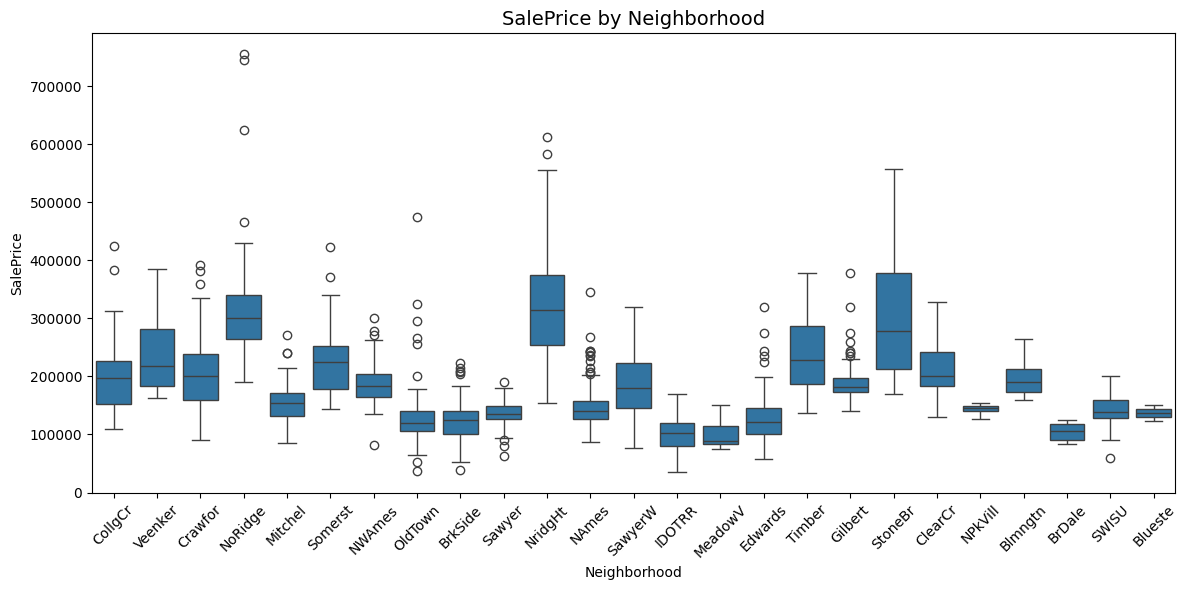

Average SalePrice by Neighborhood:


Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

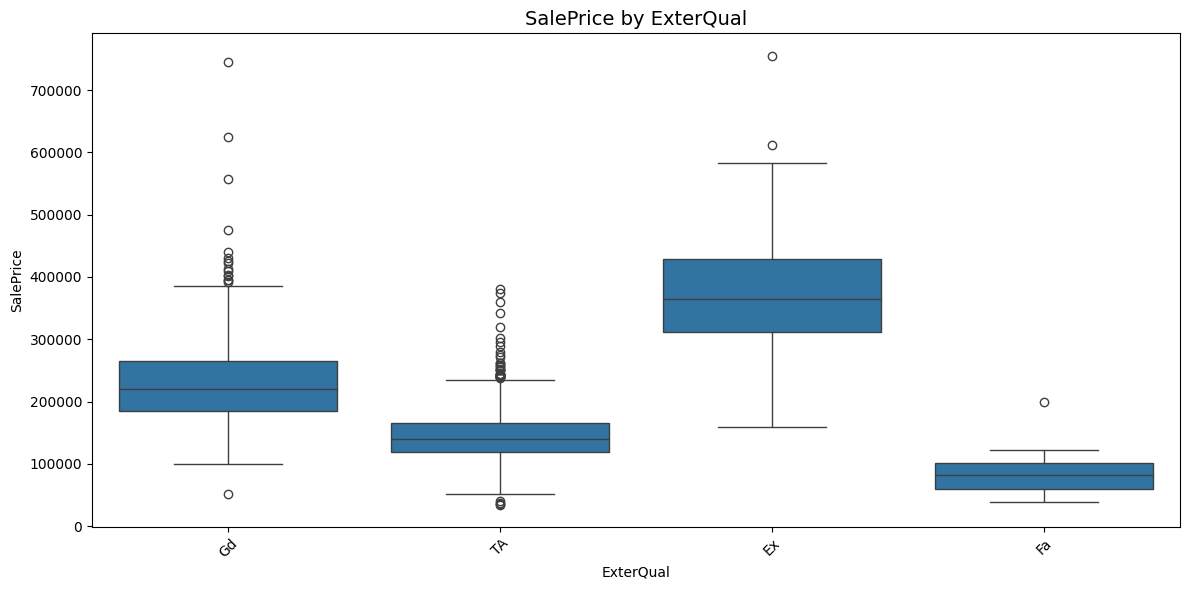

Average SalePrice by ExterQual:


ExterQual
Ex    367360.961538
Gd    231633.510246
TA    144341.313466
Fa     87985.214286
Name: SalePrice, dtype: float64

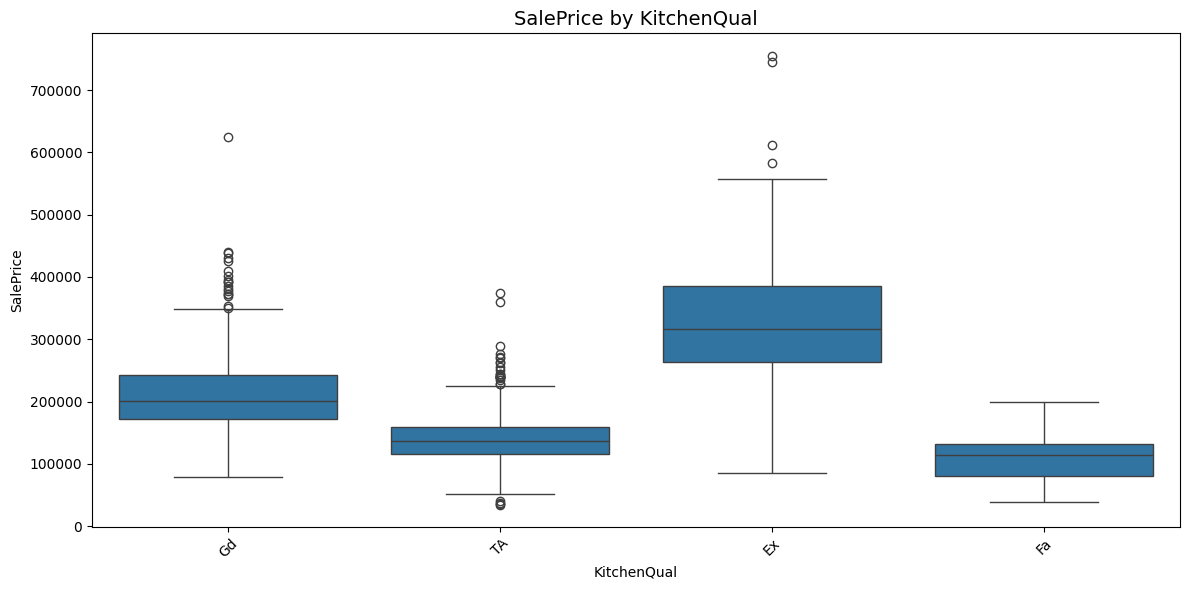

Average SalePrice by KitchenQual:


KitchenQual
Ex    328554.670000
Gd    212116.023891
TA    139962.511565
Fa    105565.205128
Name: SalePrice, dtype: float64

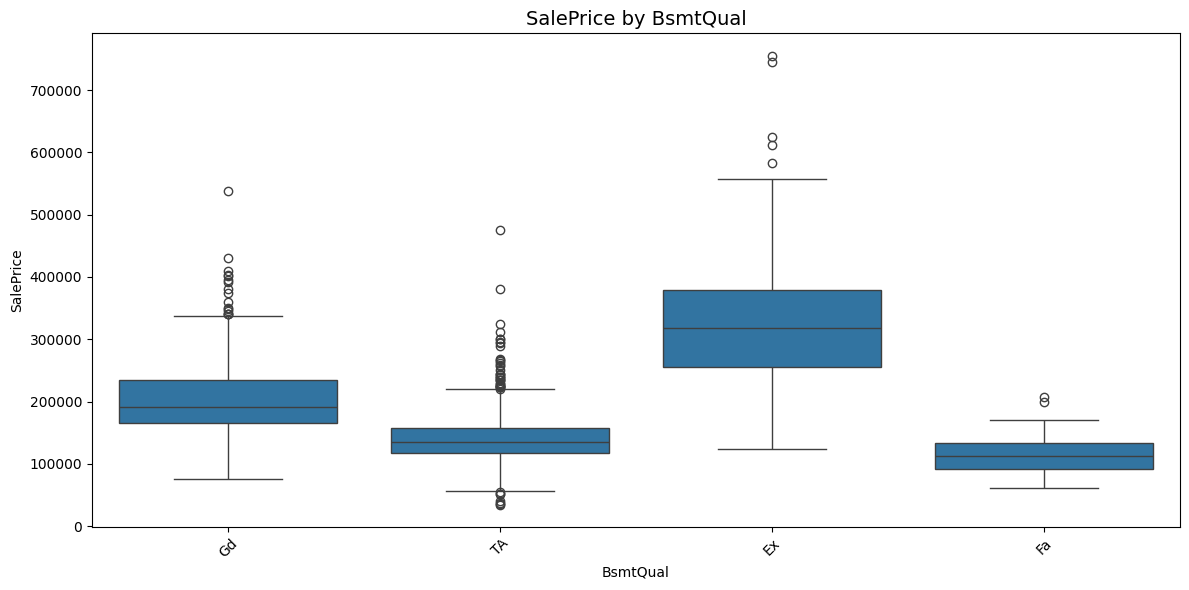

Average SalePrice by BsmtQual:


BsmtQual
Ex    327041.041322
Gd    202688.478964
TA    140759.818182
Fa    115692.028571
Name: SalePrice, dtype: float64

In [12]:
# Select categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns

print(f"Number of categorical features: {len(categorical_features)}")
print("Categorical features:")
print(categorical_features.tolist())

# Analyze important categorical features
important_cat_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

for feature in important_cat_features:
    if feature in train_data.columns:
        plt.figure(figsize=(12, 6))

        # Count of categories
        value_counts = train_data[feature].value_counts().sort_values(ascending=False)

        # Box plot of SalePrice by category
        sns.boxplot(x=feature, y='SalePrice', data=train_data)
        plt.title(f'SalePrice by {feature}', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Average SalePrice by category
        avg_price = train_data.groupby(feature)['SalePrice'].mean().sort_values(ascending=False)
        print(f"Average SalePrice by {feature}:")
        display(avg_price)

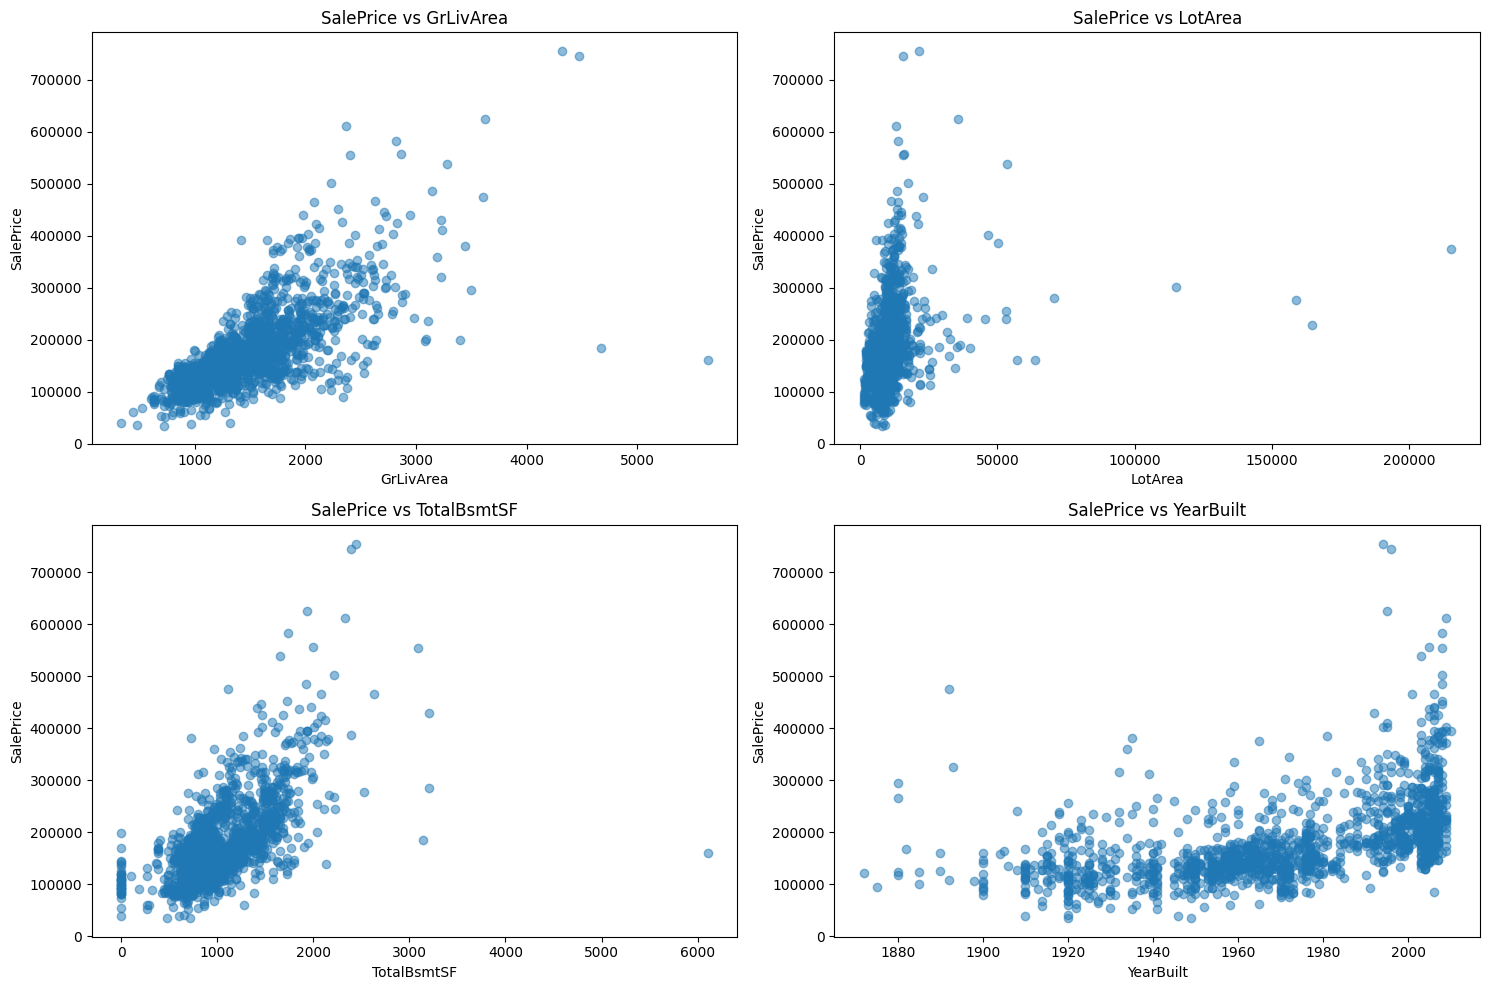

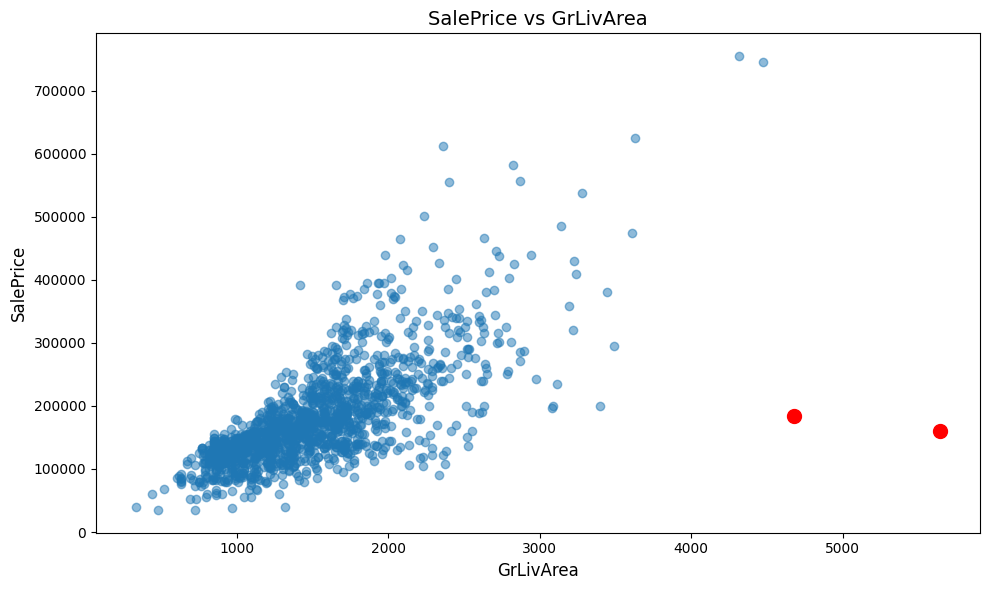

Potential outliers in GrLivArea:


,Id,GrLivArea,SalePrice
523,524,4676,184750
1298,1299,5642,160000


In [13]:
# Check for outliers in key features
plt.figure(figsize=(15, 10))

# GrLivArea vs SalePrice
plt.subplot(2, 2, 1)
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# LotArea vs SalePrice
plt.subplot(2, 2, 2)
plt.scatter(train_data['LotArea'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs LotArea')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

# TotalBsmtSF vs SalePrice
plt.subplot(2, 2, 3)
plt.scatter(train_data['TotalBsmtSF'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

# YearBuilt vs SalePrice
plt.subplot(2, 2, 4)
plt.scatter(train_data['YearBuilt'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# Identify specific outliers in GrLivArea
plt.figure(figsize=(10, 6))
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs GrLivArea', fontsize=14)
plt.xlabel('GrLivArea', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)

# Highlight potential outliers
outliers = train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)]
plt.scatter(outliers['GrLivArea'], outliers['SalePrice'], color='red', s=100, alpha=1)

plt.tight_layout()
plt.show()

print("Potential outliers in GrLivArea:")
display(outliers[['Id', 'GrLivArea', 'SalePrice']])

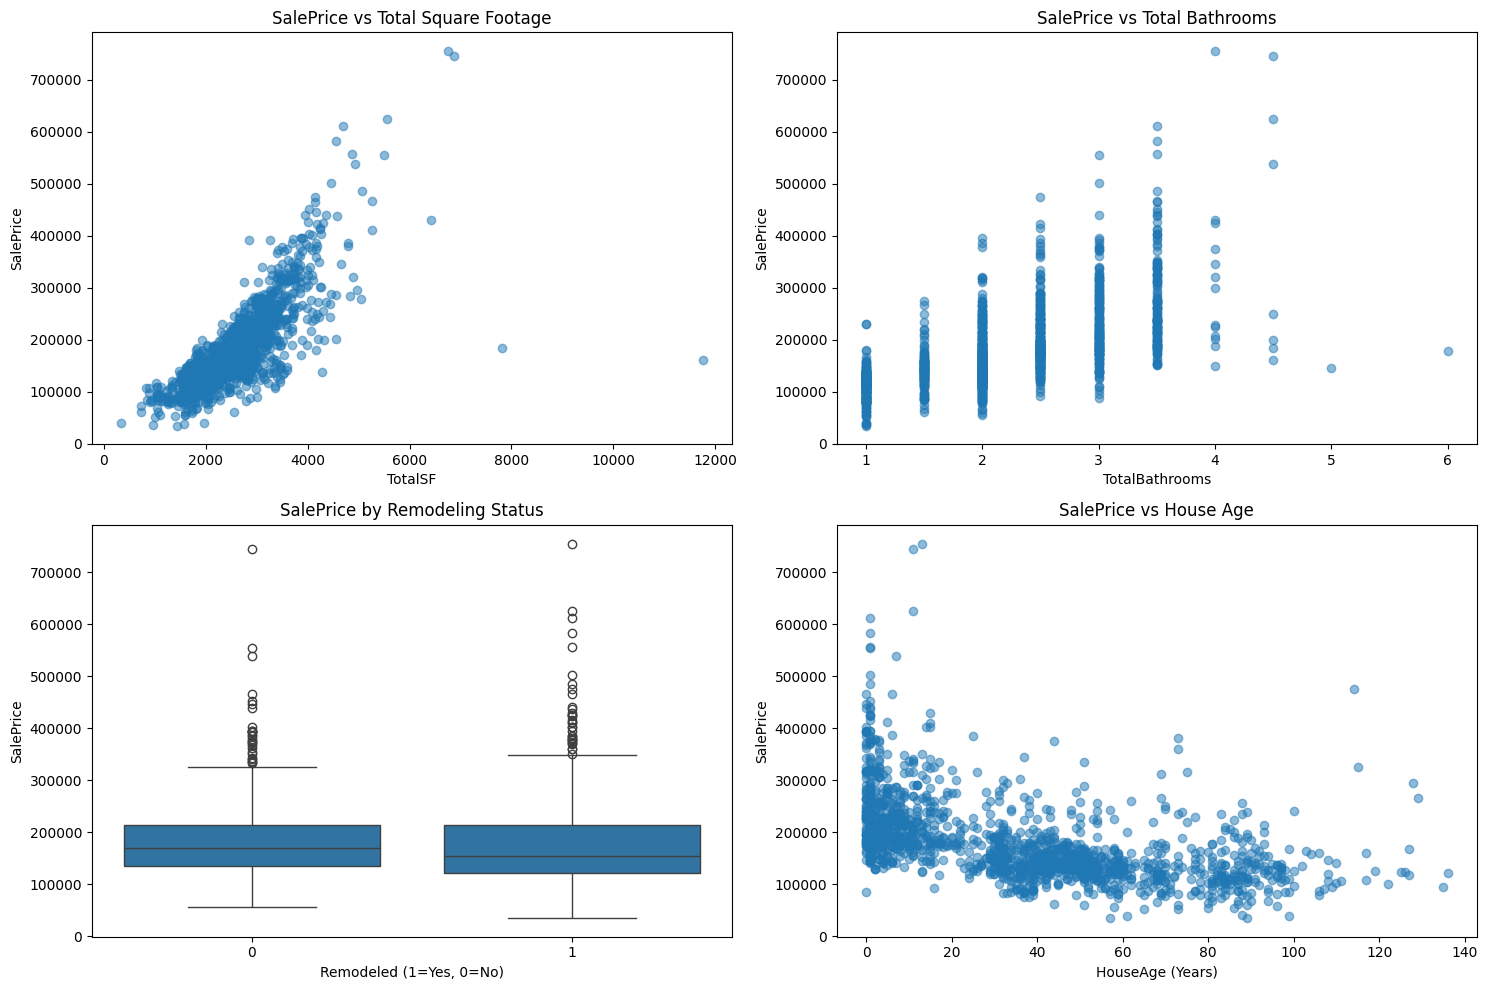

Correlation of Engineered Features with SalePrice:


SalePrice         1.000000
TotalSF           0.782260
TotalBathrooms    0.631731
HasPool           0.093708
Remodeled        -0.021933
HouseAge         -0.523350
Name: SalePrice, dtype: float64

In [14]:
# Create some example engineered features
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['TotalBathrooms'] = train_data['FullBath'] + (0.5 * train_data['HalfBath']) + \
                              train_data['BsmtFullBath'] + (0.5 * train_data['BsmtHalfBath'])
train_data['HasPool'] = train_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_data['Remodeled'] = (train_data['YearRemodAdd'] != train_data['YearBuilt']).astype(int)
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']

# Analyze engineered features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(train_data['TotalSF'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs Total Square Footage')
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')

plt.subplot(2, 2, 2)
plt.scatter(train_data['TotalBathrooms'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs Total Bathrooms')
plt.xlabel('TotalBathrooms')
plt.ylabel('SalePrice')

plt.subplot(2, 2, 3)
sns.boxplot(x='Remodeled', y='SalePrice', data=train_data)
plt.title('SalePrice by Remodeling Status')
plt.xlabel('Remodeled (1=Yes, 0=No)')
plt.ylabel('SalePrice')

plt.subplot(2, 2, 4)
plt.scatter(train_data['HouseAge'], train_data['SalePrice'], alpha=0.5)
plt.title('SalePrice vs House Age')
plt.xlabel('HouseAge (Years)')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# Calculate correlation of engineered features with SalePrice
engineered_features = ['TotalSF', 'TotalBathrooms', 'HasPool', 'Remodeled', 'HouseAge']
engineered_corr = train_data[engineered_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("Correlation of Engineered Features with SalePrice:")
display(engineered_corr)

Summary of Data Exploration Findings

Target Variable (SalePrice)
- Distribution: SalePrice is positively skewed (right-skewed) with a skewness value of approximately 1.88, indicating most houses are in the lower to middle price range with fewer high-priced properties.
- Range: The minimum sale price is \$34,900 and the maximum is \$755,000, showing a wide range of house prices in the dataset.
- Key statistics: Mean sale price is approximately \$180,921, median is \$163,000, and standard deviation is \$79,442, indicating significant variability in prices.

Most Influential Features
- Top positively correlated features:
  1. OverallQual (0.79): Overall material and finish quality (rated 1-10)
  2. GrLivArea (0.71): Above ground living area square feet
  3. GarageCars (0.64): Size of garage in car capacity
  4. GarageArea (0.62): Size of garage in square feet
  5. TotalBsmtSF (0.61): Total square feet of basement area
- Top negatively correlated features:
  1. KitchenAbvGr (-0.14): Number of kitchens above grade
  2. EnclosedPorch (-0.13): Enclosed porch area in square feet
  3. MSSubClass (-0.08): The building class (type of dwelling)
  4. OverallCond (-0.08): Overall condition rating
  5. YrSold (-0.03): Year sold
- Key categorical features: 
  1. Neighborhood: Areas like NoRidge, NridgHt, and StoneBr have significantly higher prices
  2. ExterQual: Houses with excellent exterior quality have much higher prices
  3. KitchenQual: Kitchen quality shows strong relationship with price
  4. BsmtQual: Excellent basement quality correlates with higher prices

 Missing Data
- Features with significant missing values:
  1. PoolQC (99.7%): Pool quality - missing values indicate no pool
  2. MiscFeature (96.4%): Miscellaneous features not covered elsewhere
  3. Alley (93.8%): Type of alley access - missing values indicate no alley access
  4. Fence (80.8%): Fence quality - missing values indicate no fence
  5. FireplaceQu (47.3%): Fireplace quality - missing values indicate no fireplace
- Potential strategies for handling missing data:
  1. For categorical features with high missing percentages (PoolQC, MiscFeature, Alley, Fence, FireplaceQu), replace with 'None' as missing values indicate absence of the feature
  2. For LotFrontage (17.7% missing), impute based on neighborhood median or lot size
  3. For Garage-related features (~5.5% missing), replace with 'None' or 'NA' for categorical and 0 for numerical
  4. For Basement-related features (~2.5% missing), replace with 'NA' as missing values indicate no basement

 Outliers
- Identified outliers in:
  1. GrLivArea: Two houses with large living area (>4000 sq ft) but relatively low prices (<\$300,000)
  2. LotArea: Several properties with extremely large lots
  3. TotalBsmtSF: Houses with unusually large basements
  4. YearBuilt: Some older houses with prices that don't follow the general trend
- Potential impact on modeling: These outliers can skew regression models, leading to higher error rates and poor generalization to new data.
- Recommended approach: Remove the two clear outliers in GrLivArea (>4000 sq ft with low prices). For other potential outliers, consider robust regression techniques or transformations to reduce their influence.

 Feature Engineering
- Promising engineered features:
  1. TotalSF (0.79): Total square footage combining basement, first floor, and second floor
  2. OverallGrade (0.77): Combined measure of quality and condition (OverallQual × OverallCond)
  3. TotalBathrooms (0.63): Total number of bathrooms including full and half baths
  4. Remodeled (0.53): Binary indicator of whether the house has been remodeled (YearRemodAdd ≠ YearBuilt)
  5. HouseAge (0.52): Age of house at time of sale (YrSold - YearBuilt)
  6. TotalPorchSF (0.44): Total porch area combining all porch types
- Transformation needs:
  1. Log transformation for SalePrice to normalize its distribution
  2. Log transformation for highly skewed features (skew > 0.75) such as:
     - LotArea (skew: 12.21)
     - MiscVal (skew: 21.94)
     - LotFrontage (skew: 2.14)
     - 1stFlrSF (skew: 1.37)
     - GrLivArea (skew: 1.27)
     - TotalBsmtSF (skew: 1.52)
  3. One-hot encoding for nominal categorical features (Neighborhood, MSZoning, etc.)
  4. Ordinal encoding for ordinal categorical features (ExterQual, KitchenQual, etc.)